In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
# 去除不必要的警告信息
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


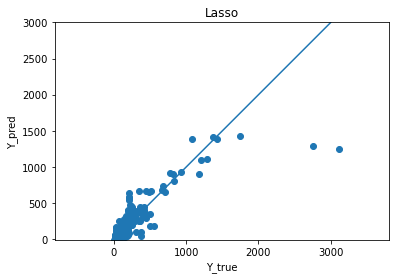

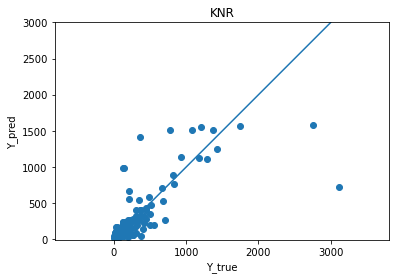

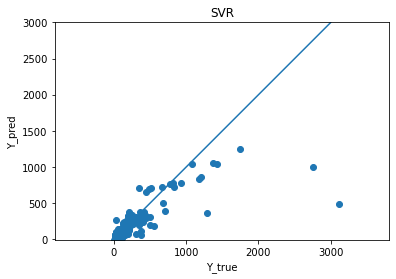

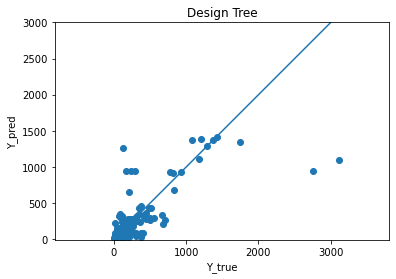

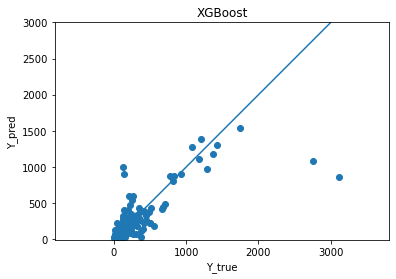

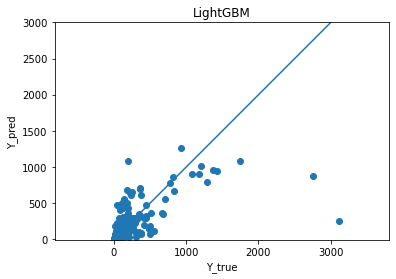

In [4]:
# 这里读取结果，并记录数据
MSE_val = []    # MSE指标
R_val = []      # 相关系数
indices = []    # 记录每个方法选出的前20个最重要的特征（KNN没有重要性所以不记录它的），

methods = ['Lasso','KNN','SVR','tree','xgb','lgbm']
names = ['Lasso','KNR','SVR','Design Tree','XGBoost','LightGBM']


for idx, method in enumerate(methods):
    # 读数据
    fname = method+'_0.mat'
    data = sio.loadmat('./result/'+fname)
    # 记录每个方法指标的均值
    MSE_val.append(np.mean(data['MSE']))
    R_val.append(np.mean(data['R_value']))
    # 这里使用第一折的预测结果绘制回归曲线
    plt.figure()
    plt.scatter(data['y_true'][0][0][0,:],data['y_pred'][0][0][0,:])
    plt.title(names[idx])
    plt.xlabel('Y_true')
    plt.ylabel('Y_pred')
    plt.axis('equal')
    plt.plot([i for i in range(3000)],[i for i in range(3000)])
    plt.xlim([-10,3000])
    plt.ylim([-10,3000])
    plt.savefig(names[idx]+'.jpg')  # 保存图片
    # 记录重要的特征，KNN没有所以不记录它的
    if method!='KNN':
        fea_importance = np.mean(data['fea_importances'],axis = 0)
        indices.append(np.argsort(fea_importance)[::-1][0:20])


In [3]:
# 制表
result = pd.DataFrame({"Method":names,"MSE":MSE_val,"R_value":R_val})
result

,Method,MSE,R_value
0,Lasso,4955.009719,0.889942
1,KNR,5870.876749,0.869209
2,SVR,6501.773952,0.864277
3,Design Tree,11252.228548,0.800913
4,XGBoost,6355.479464,0.860705
5,LightGBM,8167.291599,0.804604


In [10]:
# 分析重要的特征

# 1419维特征对应如下：['rating','num_reviews','body','acidity','year','winery*476','wine*840','region*76','type*22']

# indices记录了各个方法选择的前20个重要特征，维度为 5 x 20
# 在这个5 x 20的矩阵中，统计每个特征被这些方法选中的次数，存放到fea_dict中
indices = np.array(indices)
unique, counts = np.unique(indices, return_counts=True)
fea_dict = dict(zip(unique, counts))

# fea_dict不方便用来排序，所以把它转化成一个1419维的列表fea_cnt
fea_cnt = [0 for i in range(1419)]
for i in range(1419):
    if i in fea_dict.keys():
        fea_cnt[i] = fea_dict[i]

# 对列表进行排序，统计前20个出现次数最多的特征，存放到important_feas中
important_feas = np.argsort(fea_cnt)[::-1][0:20]

# 根据important_feas统计每一种特征出现的次数
fea_name = ['rating','num_reviews','body','acidity','year','winery','wine','region','type']
fea_list = [0 for i in range(9)]
for i in important_feas:
    if i < 5:
        # print(fea_name[i])
        fea_list[i] += 1
    elif i < (5+476):   # 如果特征的序号属于[5,480]之间，则是酒庄(winery)特征
        # print('winery')
        fea_list[5] += 1
    elif i < (5+476+840):   # 如果特征的序号属于[451,1320]之间，则是酒类(wine)特征
        # print('wine')
        fea_list[6] += 1
    elif i < (5+476+840+76):    # 如果特征的序号属于[1321,1396]之间，则是地区(region)特征
        # print('region')
        fea_list[7] += 1
    else:
        # print('type') # 如果特征的序号属于[1397,1418]之间，则是种类(type)特征
        fea_list[8] += 1

# 输出每种特征的统计结果
fea_list

[1, 0, 0, 0, 1, 6, 11, 1, 0]

In [77]:
# 根据结果可以看到酒类和酒庄特征远远大于其他类别的特征。
print('最重要的特征为：酒类和酒庄')

最重要的特征为：酒类和酒庄
